In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

In [56]:
# Replace 'chargesheet_file.csv' and 'file_report_file.csv' with your actual file paths
chargesheet_df = pd.read_csv("D:\\Anindya\\ISI Project - Data Cleaning + Data Annotation\\Main Sheets\\Format for Time Taken to Complete Charge Sheet.csv")  # <-- Change file path if needed
file_report_df = pd.read_csv("D:\\Anindya\\ISI Project - Data Cleaning + Data Annotation\\Main Sheets\\Format for Time Taken to Complete Final Report.csv")  # <-- Change file path if needed

# Display initial information for both datasets
print("Chargesheet Dataset Info:")
print(chargesheet_df.info())  # Check for nulls and data types

print("\nFile Report Dataset Info:")
print(file_report_df.info())  # Check for nulls and data types

# Display first few rows to visually inspect data
display(chargesheet_df.head())
display(file_report_df.head())

Chargesheet Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          100 non-null    int64 
 1   Crime Head    100 non-null    object
 2   IPC / SLL     100 non-null    object
 3   <= 2 months   100 non-null    int64 
 4   <= 3 months   100 non-null    int64 
 5   <= 6 months   100 non-null    int64 
 6   <= 12 months  100 non-null    int64 
 7   <= 24 months  100 non-null    int64 
 8   > 24 months   100 non-null    int64 
 9   Total #       100 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 7.9+ KB
None

File Report Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          100 non-null    int64 
 1   Crime Head    100 non-null    object
 2   IPC / S

Year                  Crime Head IPC / SLL  <= 2 months  <= 3 months  \
0  2022             Prohibition Act       SLL       300401       480526   
1  2022                       Theft       IPC        45895       100965   
2  2022                        Hurt       IPC       219846       364401   
3  2022  Rash Driving on Public Way       IPC       260703       345854   
4  2022                  Excise Act       SLL       242669       314185   

   <= 6 months  <= 12 months  <= 24 months  > 24 months  Total #  
0       599486        654741        680798       691648   691648  
1       143823        174200        188599       191540   191540  
2       463888        521587        558868       570027   570027  
3       398951        429034        444205       446074   446074  
4       341925        358013        364627       365264   365264

Year                  Crime Head IPC / SLL  <= 2 months  <= 3 months  \
0  2022             Prohibition Act       SLL         2036         5386   
1  2022                       Theft       IPC       121346       234676   
2  2022                        Hurt       IPC        12606        26665   
3  2022  Rash Driving on Public Way       IPC         8188        16438   
4  2022                  Excise Act       SLL          464          779   

   <= 6 months  <= 12 months  <= 24 months  > 24 months  Total #  
0         7262          7854          8407         8490     8490  
1       343677        417253        441896       447984   447984  
2        41401         51729         61003        64041    64041  
3        24425         30185         35902        36481    36481  
4         1134          1482          1667         1727     1727

In [57]:
#Crime heads to analyze
crime_heads = ["Kidnapping and Abduction", "Hurt", "Burglary", "Causing Death by Negligence", "Disobedience to order duly promulgated by Public Servant"]  


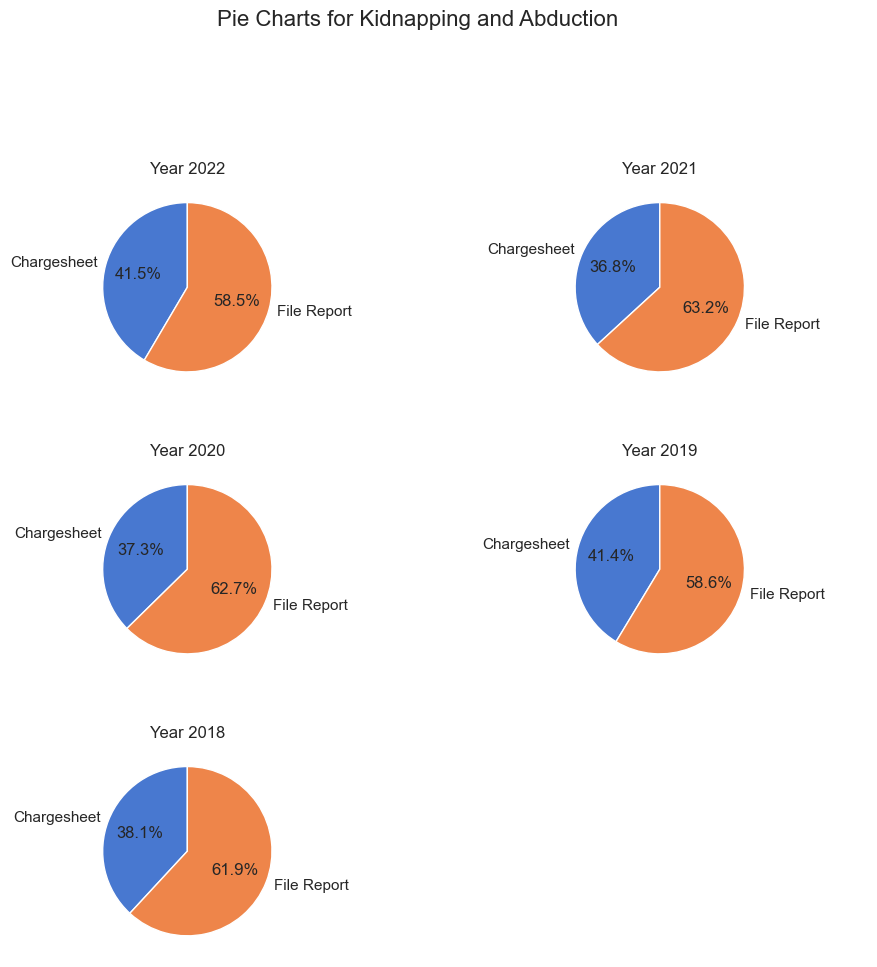

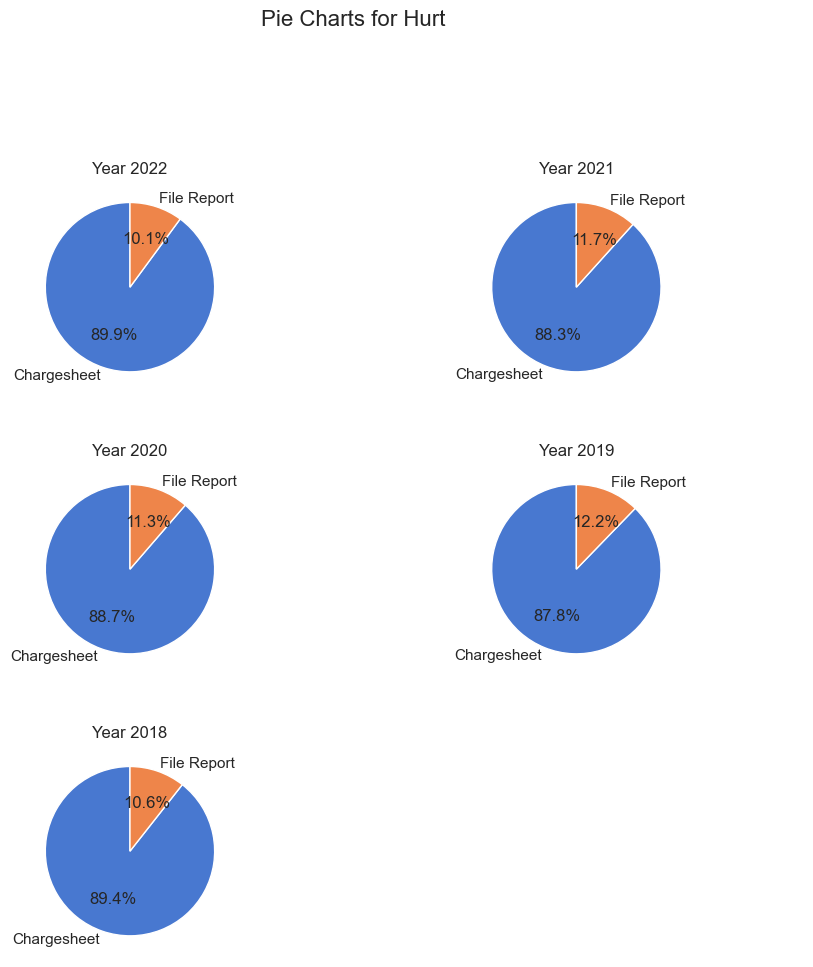

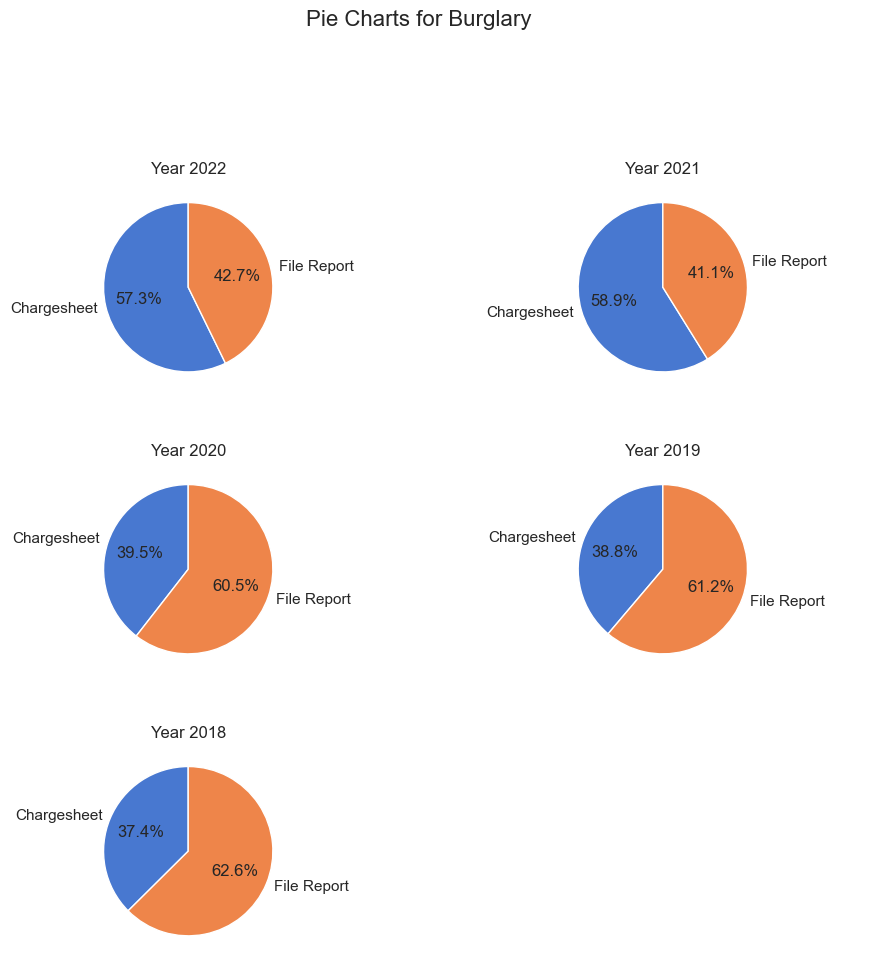

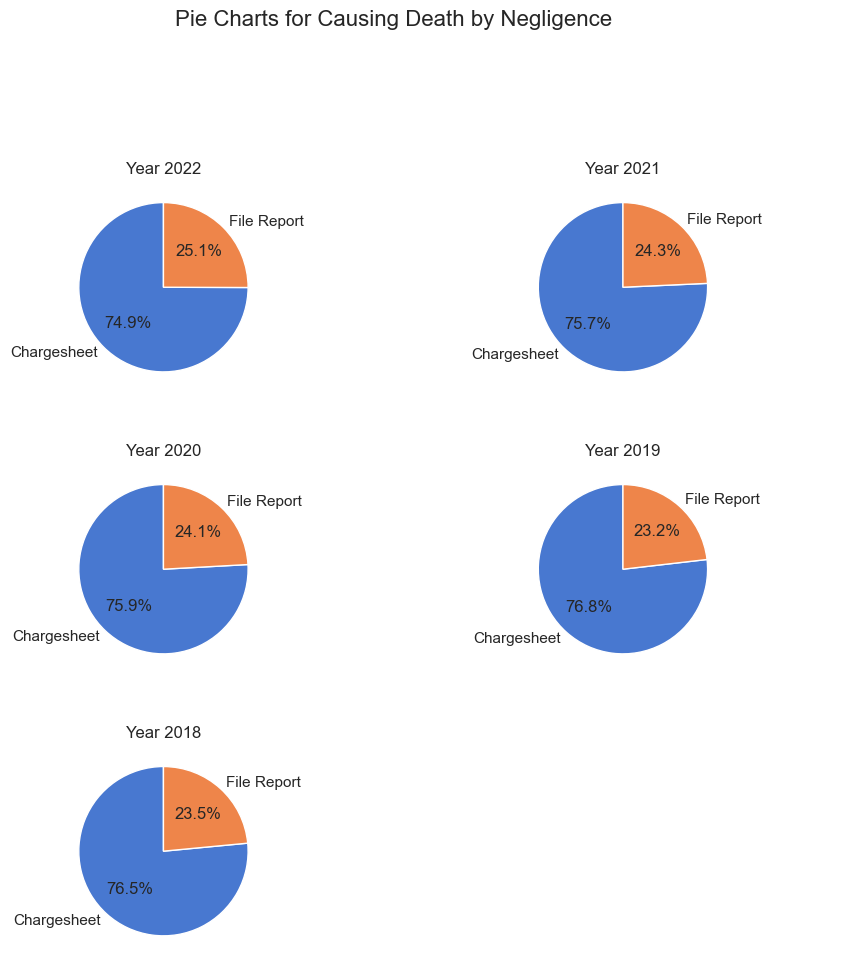

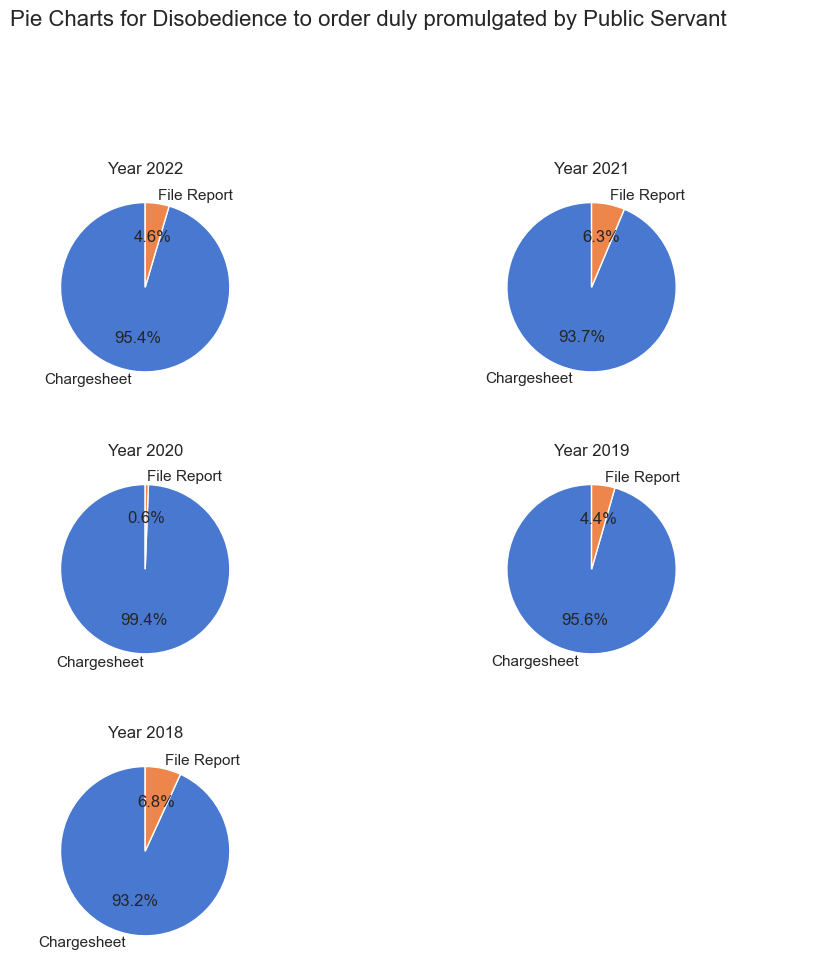

In [58]:
# Define the range of years
years = [2022, 2021, 2020, 2019, 2018]

# Loop through each specified crime head
for crime_head in crime_heads:
    # Filter data for the current crime head
    chargesheet_data = chargesheet_df[chargesheet_df['Crime Head'] == crime_head]
    file_report_data = file_report_df[file_report_df['Crime Head'] == crime_head]
    
    # Create a figure with a 2x3 grid (2 columns, 3 rows for better arrangement)
    fig, axs = plt.subplots(3, 2, figsize=(10, 10.5))  # Adjusted figsize for better vertical space
    fig.suptitle(f"Pie Charts for {crime_head}", fontsize=16)
    
    # Flatten the axs array to make indexing easier
    axs = axs.flatten()
    
    # Assign years to the positions for 2 columns and 3 rows
    layout_years = [2022, 2021, 2020, 2019, 2018]
    
    # Loop through each year and assign them to the layout
    for i, year in enumerate(layout_years):
        # Filter data for the current year
        chargesheet_total = chargesheet_data[chargesheet_data['Year'] == year]['Total #'].values
        file_report_total = file_report_data[file_report_data['Year'] == year]['Total #'].values
        
        # Check if data exists for the given year
        if chargesheet_total.size > 0 and file_report_total.size > 0:
            values = [chargesheet_total[0], file_report_total[0]]
            labels = ['Chargesheet', 'File Report']
            
            # Create pie chart with seaborn styling
            axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, 
                       colors=sns.color_palette("muted")[:2])
            axs[i].set_title(f"Year {year}")
        else:
            # Display "No Data" message if data is missing for that year
            axs[i].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            axs[i].set_title(f"Year {year}")
    
    # Hide the empty subplot (if any)
    axs[5].axis('off')
    
    # Adjust layout for aesthetics
    plt.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])  # Adjust padding for better spacing
    plt.show()